In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hdg_postprocess.formats import load_from_file

# Introduction


In this demo the typical approach to get solution with HDG solver.
The idea is that one wants usually to solve plasma solutions in steady state with diffusion values $D, \mu, \chi_i, \chi_e$ less than 1 $m^2/s$ 
Or that the diffusion will be defined by $\kappa-\varepsilon$ model


However, if passing from inputs file immediately low values of diffusion, the code will be unstable.

Therefore, we should start with high value of diffusion

For now we start from $D_0$=10 $m^2/s$, $D_{\kappa,min}=D_{\kappa,max}$=10 $m^2/s$, so that:


$D=\mu=\chi_i=\chi_e=D_\kappa=D_0+D_\kappa=20 m^2/s$, where


take care $D_0$ is taken as offset for $D_k$ as well

$D_\kappa = min(D_{\kappa,max},max(D_{\kappa,min}, \frac{\kappa q R}{c_s}))$

q is safety factor, in circular case it is set in param file and for now q=3.5, R is the major radii coordinate, $\kappa$ is "turbulent" energy, $c_s = \sqrt{(T_i+T_e)/m_i}$ is sound speed of plasma, with $T_i,T_e$ are ion and electron temperature, $m_i$ is ion (deuterium mass)

But we should not only start with high diffusion, we should also provide some inital guess, of the solution, from which the code will search for proper solution

First step is to solve several small timesteps (dt0=1e3 in adimensional values) like evolving simulation, so that the code can slowly proceed from constant solutions to more real ones

we run the code with comand:
> ./MHDG-NGammaTiTeNeutral-serial-2D ./Meshes/CircLimAlign_Quads_Nel588_P6

## Initial guess

In [21]:
# name of the mesh without ending
meshbase = 'CircLimAlign_Quads_Nel588_P6'
meshpath = 'data/meshes/'
# number of partitions, since we are in serial equal to 1
n_partitions = 1
#solution path and name base
solpath = 'data/solutions/demo_circular_k_equations/time_init/'
# the initial solution from which you start your simulations always has ending _0000
solbase = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.100E+02_DPai0.314E+06_DPae0.105E+08_0000'

In [22]:
sol=load_from_file.load_HDG_solution_from_file(solpath,solbase,meshpath,meshbase,n_partitions)

Comibining first simple solution full
Comibining first solution full


(<Figure size 1080x1620 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$k$, m$^{-2}$/s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>]],
       dtype=object),
 array([[1.00000000e+19, 0.00000000e+00, 3.44558742e+28, 3.44558742e+28,
         1.00000000e+11, 1.91421523e+03],
        [1.00000000e+19, 0.00000000e+00, 3.44558742e+28, 3.44558742e+28,
         1.00000000e+11, 1.91421523e+03],
        [1.00000000e+19, 0.00000000e+00, 3.44558742e+28, 3.44558742e+28,
         1.00000000e+1

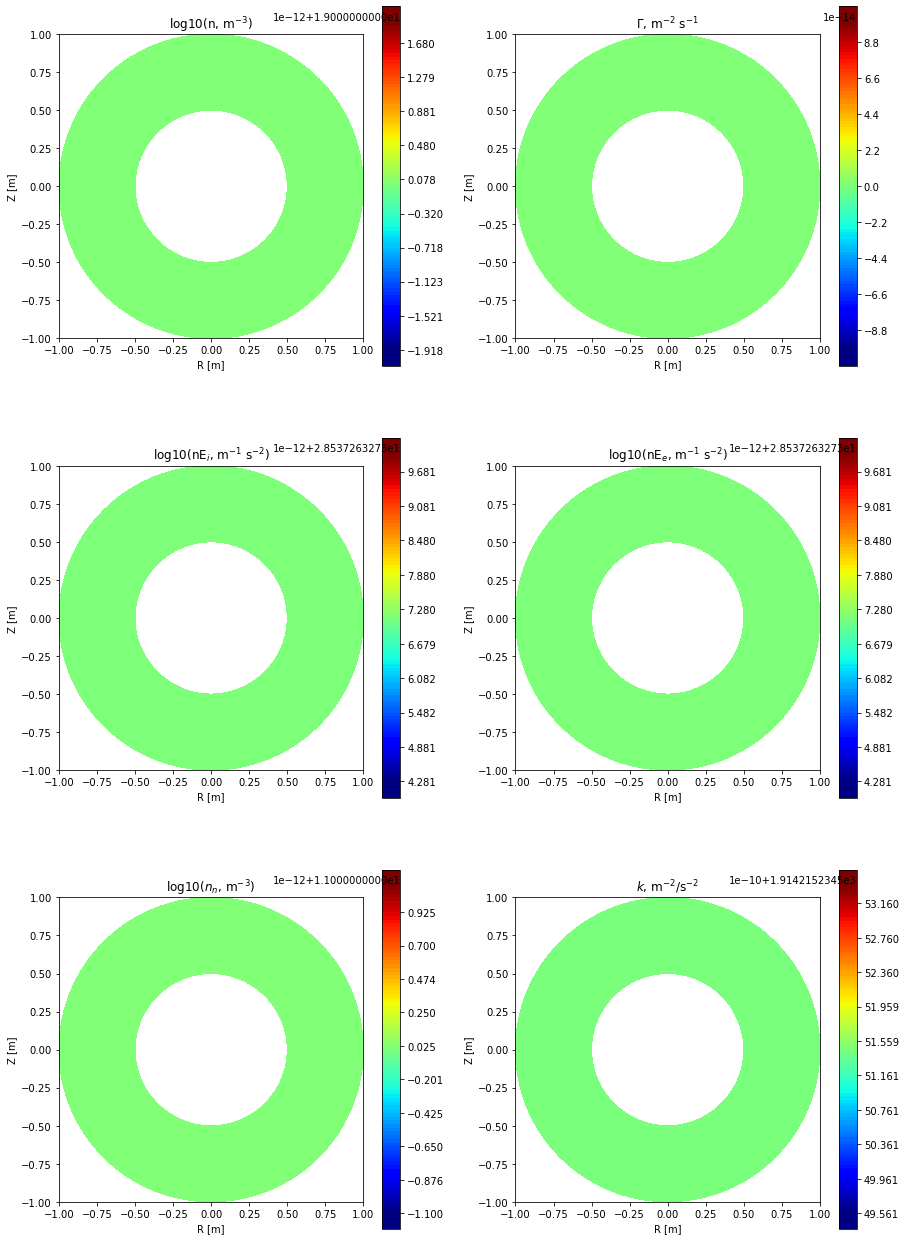

In [23]:
sol.plot_overview()
#you see that everything is constant

## after 10 small timesteps


In [24]:
# the final solution  always has no endings
solbase_after_time_init = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.100E+02_DPai0.314E+06_DPae0.105E+08'

In [25]:
sol_after_time_init =load_from_file.load_HDG_solution_from_file(solpath,solbase_after_time_init,meshpath,meshbase,n_partitions)

Now the profiles are slightly evolved

Comibining first simple solution full
Comibining first solution full


(<Figure size 1080x1620 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$k$, m$^{-2}$/s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>]],
       dtype=object),
 array([[ 9.99999999e+18,  1.45152269e+14,  3.44558739e+28,
          3.44558701e+28,  1.00018143e+11,  6.69712952e-06],
        [ 9.99999998e+18,  4.62661141e+14,  3.44558745e+28,
          3.44558716e+28,  9.99935492e+10,  3.88995951e-05],
        [ 9.99999994e+18, -3.08865210e+13,  3.44558745e+28,
          3.44558728e+2

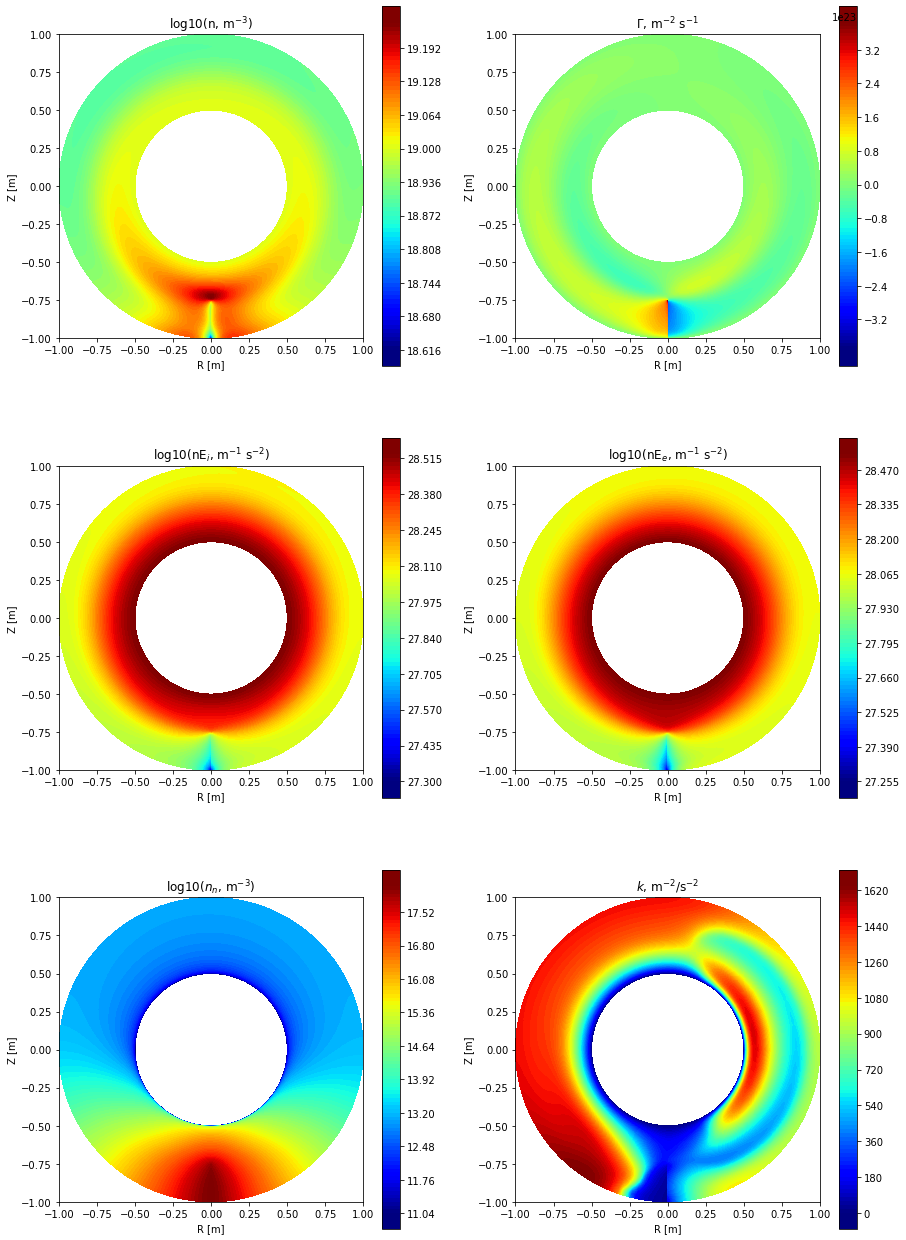

In [26]:
sol_after_time_init.plot_overview()

And you can also compare two solutions

(<Figure size 1080x1620 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'n, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'nE$_i$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'nE$_e$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'$n_n$, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$k$, m$^{-2}$/s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>]],
       dtype=object),
 array([[-1.21765475e+10,  1.45152269e+14, -3.69794104e+20,
         -4.12987979e+21,  1.81426268e+07, -1.91421523e+03],
        [-1.79900195e+10,  4.62661141e+14,  2.43055628e+20,
         -2.65036731e+21, -6.45075028e+06, -1.91421520e+03],
        [-6.27031493e+10, -3.08865210e+13,  2.41839161e+20,
         -1.41987130e+21, -3.41563662e+06, -1.91421

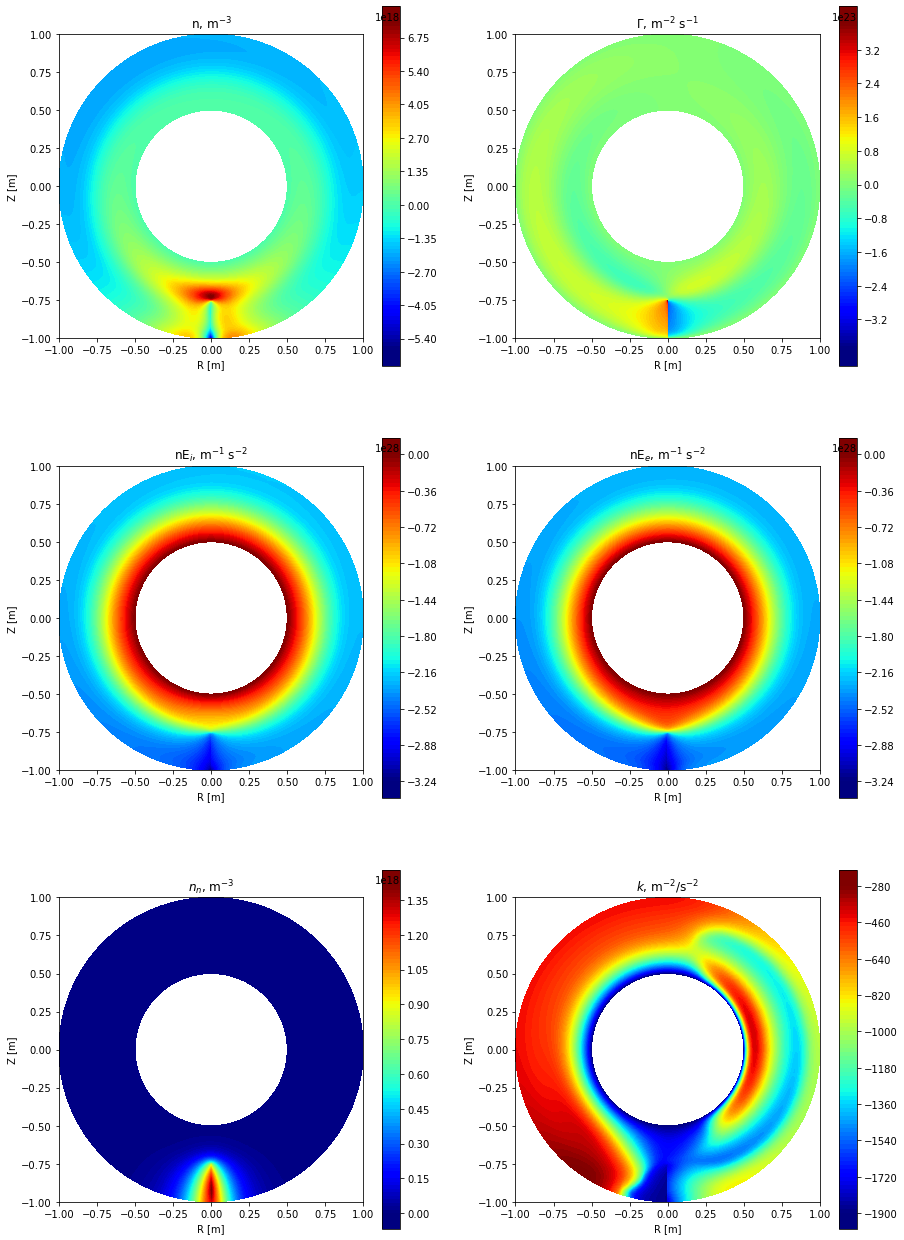

In [27]:
sol_after_time_init.plot_overview_difference(sol)

## Diffred


After these small timesteps has been done, we can start to find steady state solutions for consequently reduced diffsions


To do so we change some parameters in param file:
* psdtime = .true. this flag is actually responsible for reducing $D_0$ to diffred$\times D_0$ and $D_{k,min}$ to diffred$\timesD_{k,min}$
* diffred is also specified in param file, I set it to 0.6, so we will obtain solutions for $D_0=D_{k,min} = $ 10, 6, 3.6, ... m^2/s
* dt0=3.e9 (this is essentially steady state)
* nrp = 40 max number of Newton-Raphson iterations the code will do if the convergence criterion (tNR, which is set to 1e-4 here) is not satisfied. If the error is lower, the code will consider that it found the solution and will reduce the diffusion
* nts = 30, in this mode it means that the code will try to reduce diffusion 30 times

we now add as a second parameter to run the code the path to the solution of first 10 timesteps:
> ./MHDG-NGammaTiTeNeutral-serial-2D ./Meshes/CircLimAlign_Quads_Nel588_P6 path_to_folder/Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.100E+02_DPai0.314E+06_DPae0.105E+08

And the code will use this provided solution as initial guess now

In [33]:
#solution path and name base
solpath = 'data/solutions/demo_circular_k_equations/diffred/'
# the initial solution from which you start your simulations always has ending _0000
solbase = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.100E+02_DPai0.314E+06_DPae0.105E+08_0000'

In [34]:
sol_diffred_init = load_from_file.load_HDG_solution_from_file(solpath,solbase,meshpath,meshbase,n_partitions)

Comibining first simple solution full
Comibining first solution full


/home/ikudashev/Documents/Github/HDG_postprocess/hdg_postprocess/HDG_mesh.py:373: UserWarning: The following kwargs were not used by contour: 'triangles', 'extendrect'
  im = ax.tricontourf(self.vertices_glob[:,0], self.vertices_glob[:,1], np.log10(data),levels=n_levels


(<Figure size 1080x1620 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$k$, m$^{-2}$/s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>]],
       dtype=object),
 array([[ 9.99999999e+18,  1.45152269e+14,  3.44558739e+28,
          3.44558701e+28,  1.00018143e+11,  6.69712952e-06],
        [ 9.99999998e+18,  4.62661141e+14,  3.44558745e+28,
          3.44558716e+28,  9.99935492e+10,  3.88995951e-05],
        [ 9.99999994e+18, -3.08865210e+13,  3.44558745e+28,
          3.44558728e+2

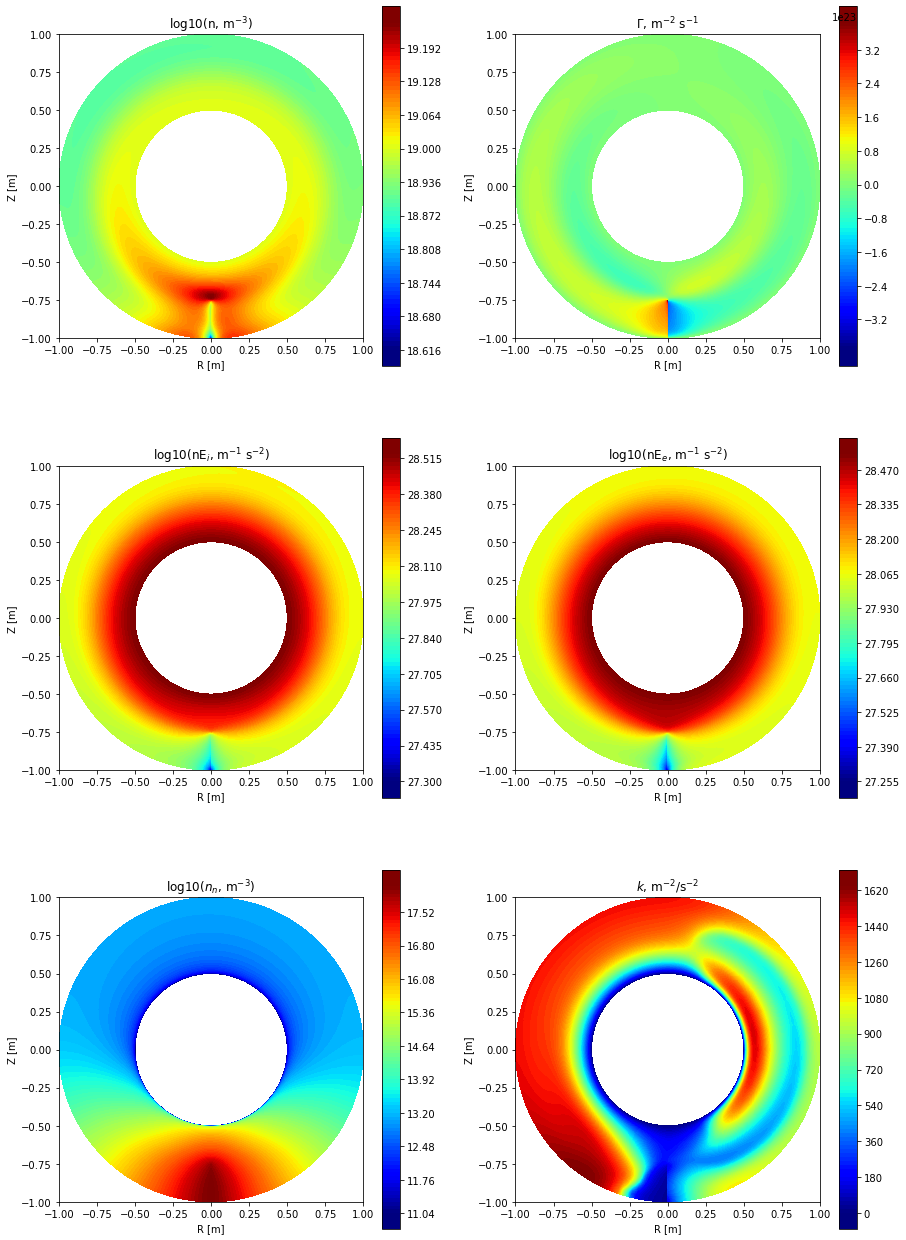

In [35]:
sol_diffred_init.plot_overview()

(<Figure size 1080x1620 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'n, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'nE$_i$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'nE$_e$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'$n_n$, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$k$, m$^{-2}$/s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>]],
       dtype=object),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]))

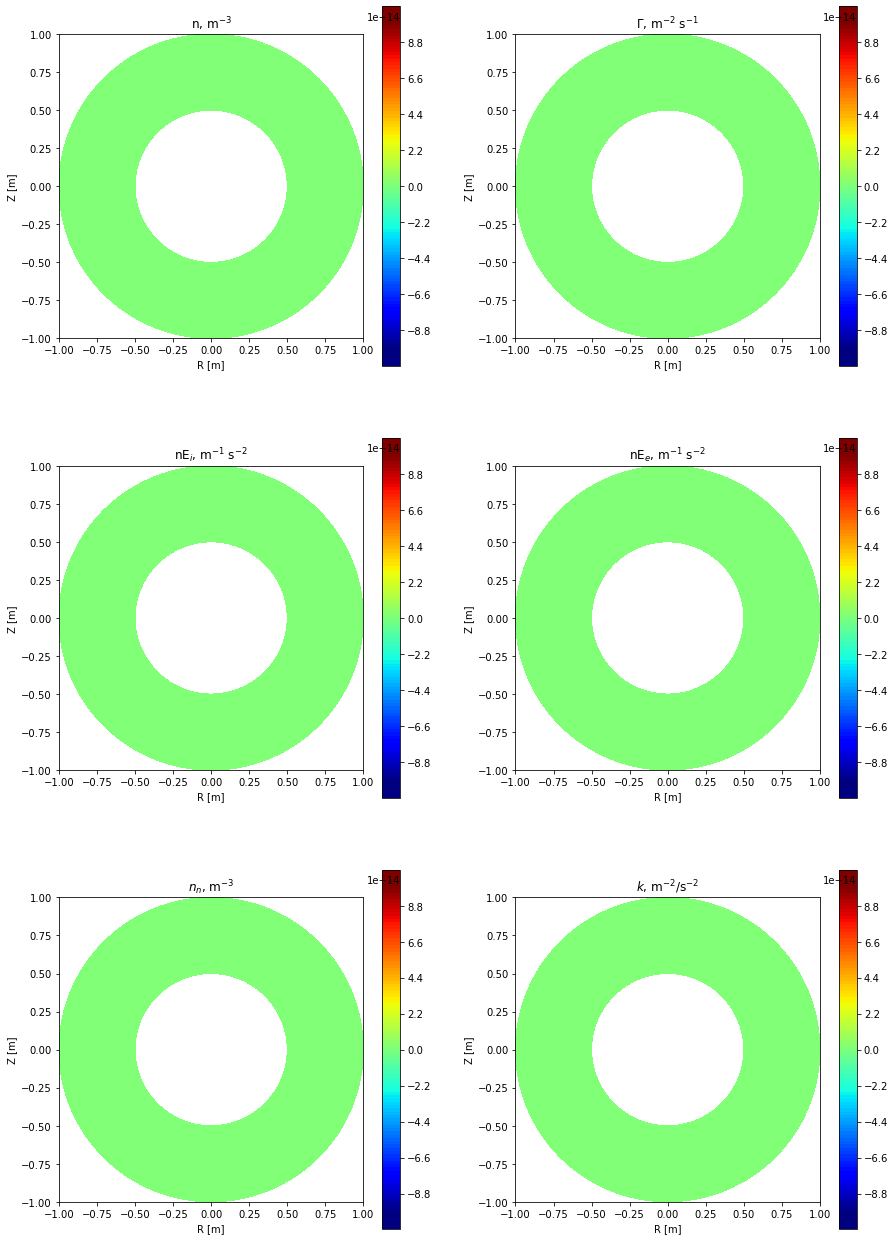

In [36]:
#solutions are equal
sol_diffred_init.plot_overview_difference(sol_after_time_init)

## and then it converges for $D_0$ = 10 m$^2$/s

In [46]:
solbase = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.100E+02_DPai0.314E+06_DPae0.105E+08'
sol_diffred_10_steady = load_from_file.load_HDG_solution_from_file(solpath,solbase,meshpath,meshbase,n_partitions)

(<Figure size 1080x1620 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$k$, m$^{-2}$/s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>]],
       dtype=object),
 array([[ 1.00000001e+19, -8.10070254e+14,  3.44558742e+28,
          3.44558677e+28,  9.99776929e+10,  2.82343845e-07],
        [ 9.99999990e+18, -1.67436188e+15,  3.44558743e+28,
          3.44558697e+28,  9.99956887e+10,  5.25394416e-08],
        [ 9.99999991e+18, -2.20142607e+15,  3.44558746e+28,
          3.44558731e+2

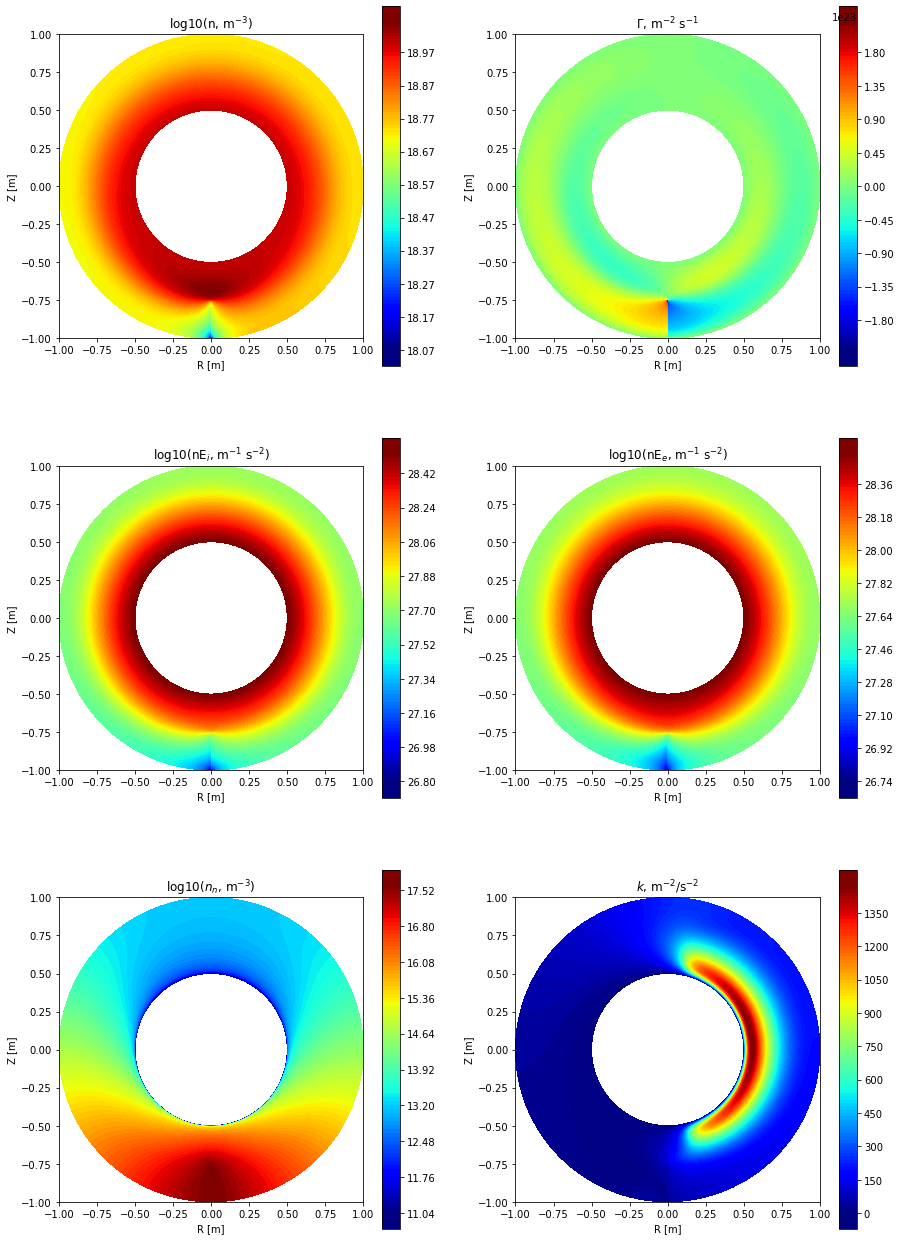

In [44]:
sol_diffred_10_steady.plot_overview()
# the turbulence now is fully ballooned as expected, the concentrations of neutrals is higher at the limiter, where recycling happens

(<Figure size 1080x1620 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'n, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'nE$_i$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'nE$_e$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'$n_n$, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$k$, m$^{-2}$/s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>]],
       dtype=object),
 array([[ 6.73118727e+10, -9.55222524e+14,  3.61150297e+20,
         -2.37563699e+21, -4.04497692e+07, -6.41478568e-06],
        [-8.36738578e+10, -2.13702302e+15, -1.95768269e+20,
         -1.82397839e+21,  2.13940596e+06, -3.88470556e-05],
        [-2.33578423e+10, -2.17053955e+15,  1.31367861e+20,
          2.79518366e+20,  5.02205823e+06, -3.92547

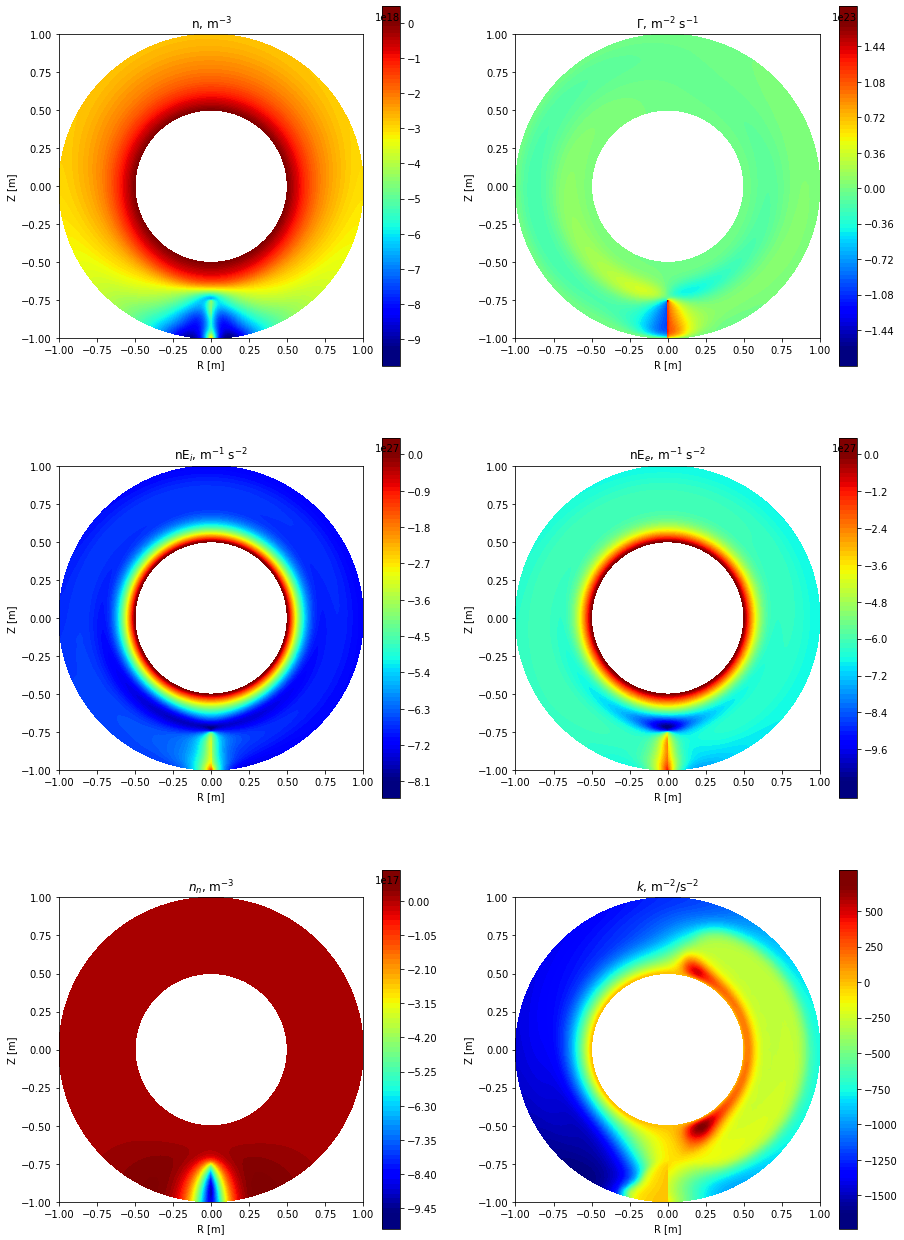

In [45]:
sol_diffred_10_steady.plot_overview_difference(sol_diffred_init)

## then the code reduces both $D_0$ and $D_k$ by 0.6, having now 6 $m^2/s$

In [47]:
solbase = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.600E+01_DPai0.314E+06_DPae0.105E+08'
sol_diffred_6_steady = load_from_file.load_HDG_solution_from_file(solpath,solbase,meshpath,meshbase,n_partitions)

Comibining first simple solution full
Comibining first solution full


/home/ikudashev/Documents/Github/HDG_postprocess/hdg_postprocess/HDG_mesh.py:373: UserWarning: The following kwargs were not used by contour: 'triangles', 'extendrect'
  im = ax.tricontourf(self.vertices_glob[:,0], self.vertices_glob[:,1], np.log10(data),levels=n_levels
/home/ikudashev/Documents/Github/HDG_postprocess/hdg_postprocess/HDG_mesh.py:378: UserWarning: The following kwargs were not used by contour: 'triangles', 'extendrect'
  im = ax.tricontourf(self.vertices_glob[:,0], self.vertices_glob[:,1], data,levels=n_levels


(<Figure size 1080x1620 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$k$, m$^{-2}$/s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>]],
       dtype=object),
 array([[ 1.00000000e+19, -1.43646369e+15,  3.44558738e+28,
          3.44558668e+28,  9.99781351e+10,  6.27484765e-07],
        [ 9.99999997e+18, -2.51263524e+15,  3.44558743e+28,
          3.44558694e+28,  9.99968862e+10,  5.67606971e-08],
        [ 9.99999999e+18, -2.73190862e+15,  3.44558745e+28,
          3.44558723e+2

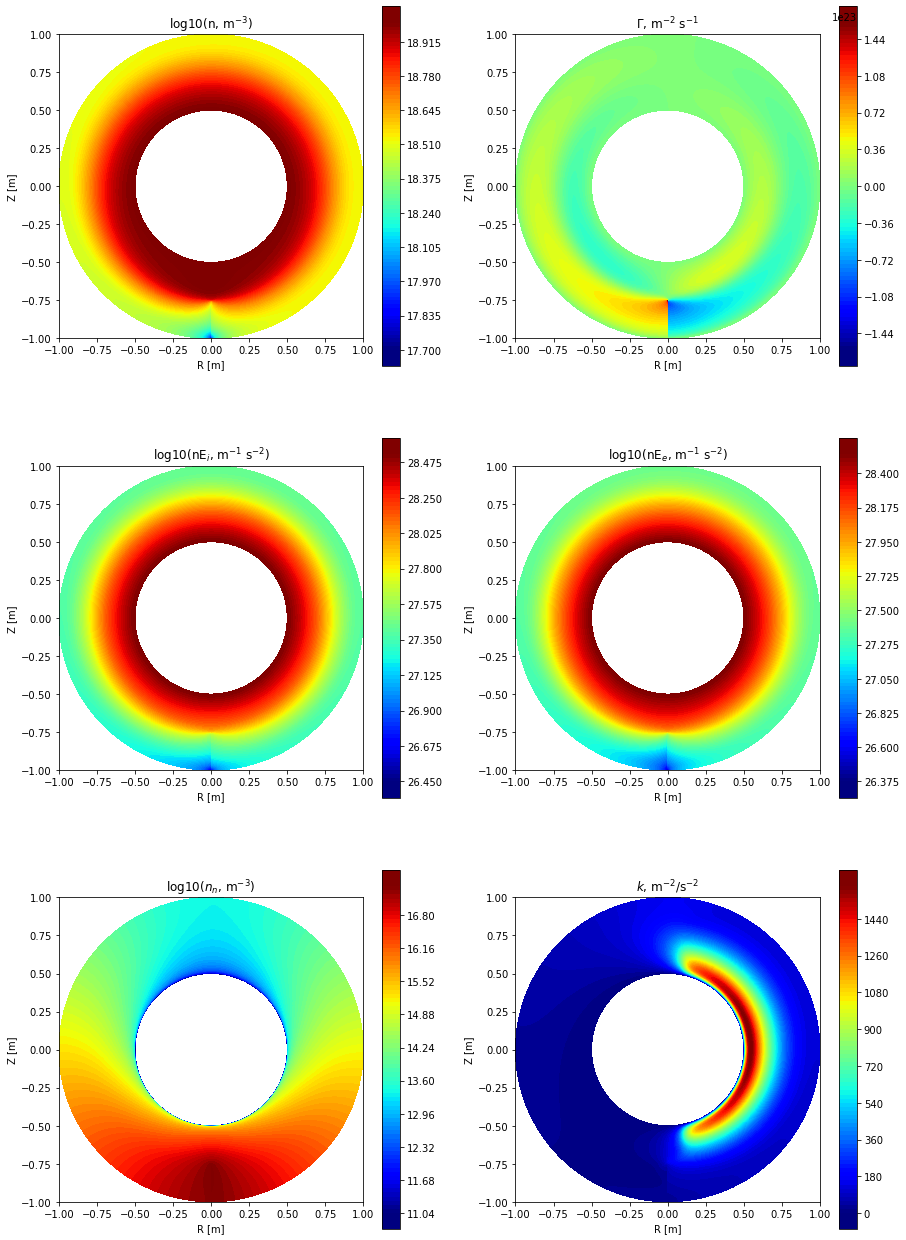

In [48]:
sol_diffred_6_steady.plot_overview()

## And it continues to reduce by 0.6 each time, when it reached $D_0$=0.101 $m^2$/s

In [49]:
solbase = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.101E+00_DPai0.314E+06_DPae0.105E+08'
sol_diffred_0_101_steady = load_from_file.load_HDG_solution_from_file(solpath,solbase,meshpath,meshbase,n_partitions)

/home/ikudashev/Documents/Github/HDG_postprocess/hdg_postprocess/HDG_mesh.py:373: UserWarning: The following kwargs were not used by contour: 'triangles', 'extendrect'
  im = ax.tricontourf(self.vertices_glob[:,0], self.vertices_glob[:,1], np.log10(data),levels=n_levels
/home/ikudashev/Documents/Github/HDG_postprocess/hdg_postprocess/HDG_mesh.py:378: UserWarning: The following kwargs were not used by contour: 'triangles', 'extendrect'
  im = ax.tricontourf(self.vertices_glob[:,0], self.vertices_glob[:,1], data,levels=n_levels


(<Figure size 1080x1620 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$k$, m$^{-2}$/s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>]],
       dtype=object),
 array([[ 1.00005860e+19, -5.11593350e+19,  3.44607504e+28,
          3.44572012e+28,  1.00391793e+11,  5.53797903e-04],
        [ 1.00003948e+19, -3.63112685e+19,  3.44594087e+28,
          3.44586540e+28,  1.00327268e+11,  6.27969760e-05],
        [ 1.00002742e+19, -2.58596533e+19,  3.44584561e+28,
          3.44595000e+2

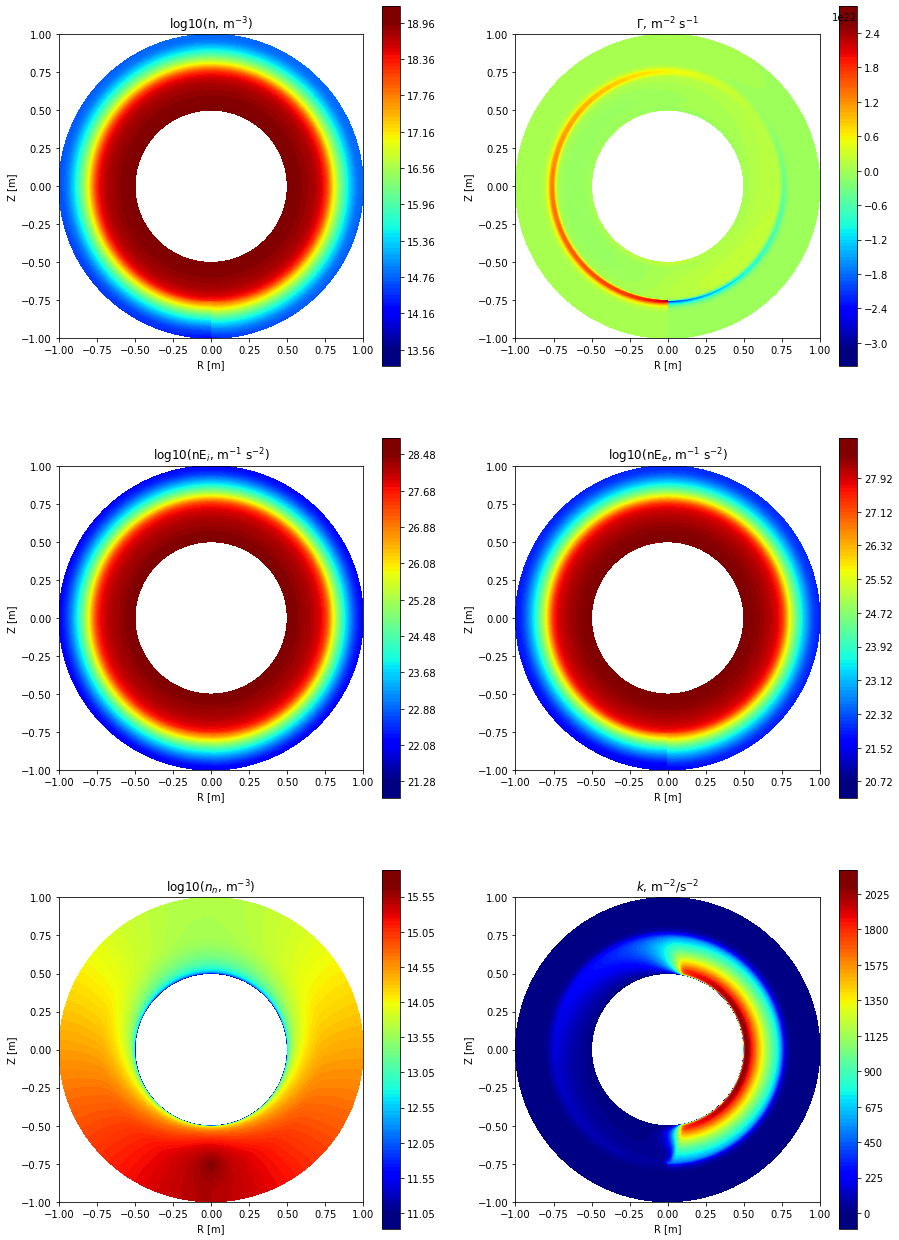

In [52]:
sol_diffred_0_101_steady.plot_overview()
# now the plasma profiles are sharper due to lower diffusion
# also due to higher gradients, there is more turbulent energy

 Remeber, we have now offset of $0.1 m^2/s, D_{k,min}=0.1 m^2/s$
 So the actual diffusion used in equations for density, momentum, ion, electron and turbulen energy is 

$D = 0.1+max(0.1,min(10,\frac{\kappa q R}{c_s}))$

## Let's plot just $\frac{\kappa q R}{c_s}$

In [56]:
# recombining the physical solution on nodes for plotting
sol_diffred_0_101_steady.init_phys_variables()

Initializing simple physical solution full
Initializing full physical solution full


### here we add R0=3.4 and q=3.5 by hand, but it's actually saved in solution, so to be modified

In [58]:
d_k = sol_diffred_0_101_steady.solution_simple_phys[:,-1]*(3.4+sol_diffred_0_101_steady.mesh.vertices_glob[:,0])*3.5/sol_diffred_0_101_steady.solution_simple_phys[:,8]

/home/ikudashev/Documents/Github/HDG_postprocess/hdg_postprocess/HDG_mesh.py:378: UserWarning: The following kwargs were not used by contour: 'triangles', 'extendrect'
  im = ax.tricontourf(self.vertices_glob[:,0], self.vertices_glob[:,1], data,levels=n_levels


<AxesSubplot:title={'center':'None'}, xlabel='R [m]', ylabel='Z [m]'>

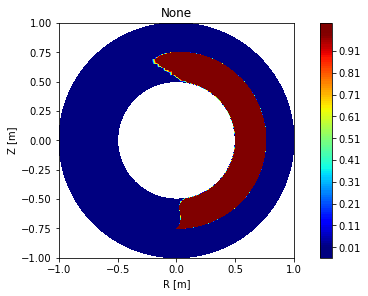

In [60]:
# see where it is larger than minimal value
sol_diffred_0_101_steady.mesh.plot_full_mesh(data=d_k>0.1,connectivity=sol_diffred_0_101_steady.mesh.connectivity_big)

### the plot above means that in the settings we had the k-equation defines transport in red region

# Now you can try to reach lower minimal diffusion
Start with changing diffred to 0.8




diff_n=diff_u=diff_e=diff_ee=diff_k_min=0.08

start with solution Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.101E+00_DPai0.314E+06_DPae0.105E+08 (which is for $D_0$ and $D_{k,min}$=0.1)